# Load dataset

In [3]:
from operator import index
# import into data frame

#churn_D208-1.csv
filePath = "https://raw.githubusercontent.com/dayanaviana/WGU/main/datasources/churn_D208-1.csv"

import pandas as pd
df = pd.read_csv(filePath, index_col=0)

categorical_columns_array = [
                 "Churn",
                 "Rural",
                 "Techie",
                 "InternetService_Fiber",
                 "InternetService_DSL",
                 "Multiple",
                 "OnlineBackup",
                 "DeviceProtection",
                 "StreamingTV",
                 "StreamingMovies",
                 "Port_modem",
                 "Tablet",
                 "OnlineSecurity",
                 "TechSupport",
                 "Contract_Monthly",
                 "PaperlessBilling",
                 "PaymentMethod_Auto",
                 "Phone"
                 ]

# Descriptive Statistics
Describe and summarize data



Churn
Chi-square test:  Power_divergenceResult(statistic=2209.0, pvalue=0.0)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   7350       0.735
1         1   2650       0.265




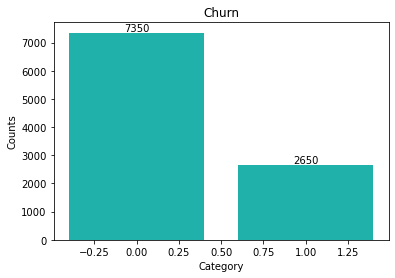



Rural
Chi-square test:  Power_divergenceResult(statistic=1119.5716, pvalue=1.8413785854748284e-245)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   6673      0.6673
1         1   3327      0.3327




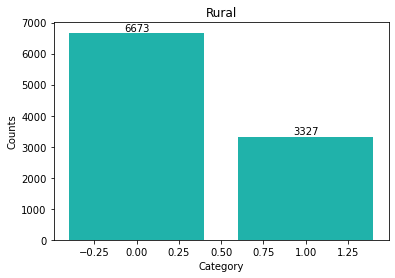



Techie
Chi-square test:  Power_divergenceResult(statistic=4411.6164, pvalue=0.0)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   8321      0.8321
1         1   1679      0.1679




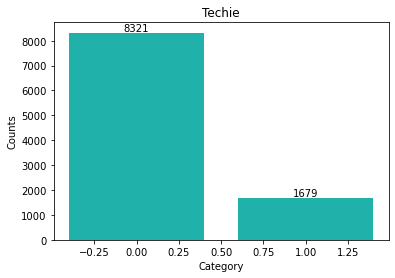



InternetService_Fiber
Chi-square test:  Power_divergenceResult(statistic=140.1856, pvalue=2.424529644705465e-32)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5592      0.5592
1         1   4408      0.4408




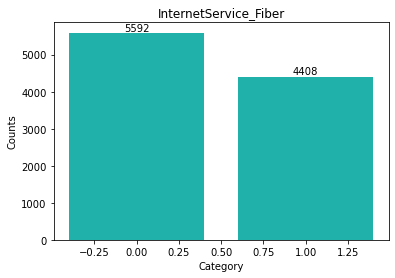



InternetService_DSL
Chi-square test:  Power_divergenceResult(statistic=944.9476, pvalue=1.663464847413049e-207)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   6537      0.6537
1         1   3463      0.3463




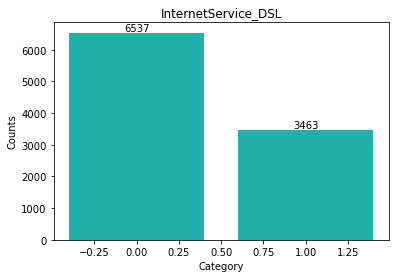



Multiple
Chi-square test:  Power_divergenceResult(statistic=61.4656, pvalue=4.505464303932248e-15)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5392      0.5392
1         1   4608      0.4608




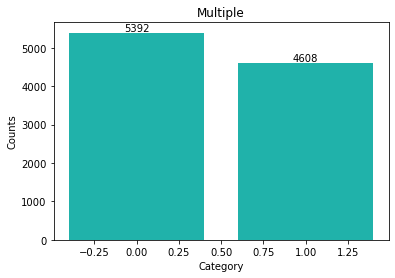



OnlineBackup
Chi-square test:  Power_divergenceResult(statistic=97.6144, pvalue=5.0832909799077264e-23)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5494      0.5494
1         1   4506      0.4506




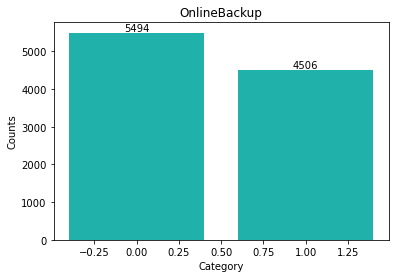



DeviceProtection
Chi-square test:  Power_divergenceResult(statistic=150.7984, pvalue=1.159982615467555e-34)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5614      0.5614
1         1   4386      0.4386




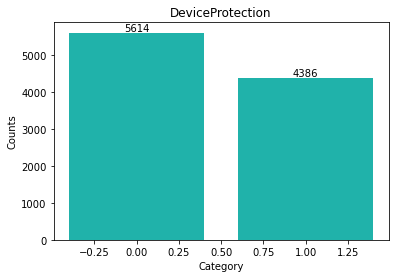



StreamingTV
Chi-square test:  Power_divergenceResult(statistic=2.0164, pvalue=0.15560768105308867)
Categories have SAME distribution
   Category  Count  Percentage
0         0   5071      0.5071
1         1   4929      0.4929




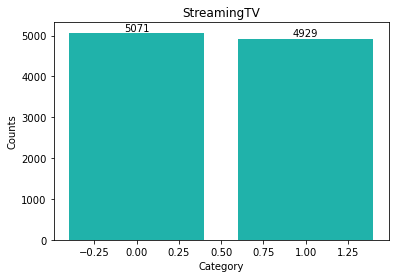



StreamingMovies
Chi-square test:  Power_divergenceResult(statistic=4.84, pvalue=0.027806895026997264)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5110       0.511
1         1   4890       0.489




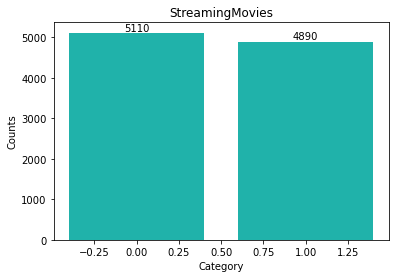



Port_modem
Chi-square test:  Power_divergenceResult(statistic=11.0224, pvalue=0.0009001744811842354)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5166      0.5166
1         1   4834      0.4834




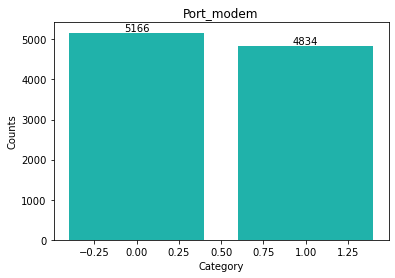



Tablet
Chi-square test:  Power_divergenceResult(statistic=1614.4324, pvalue=0.0)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   7009      0.7009
1         1   2991      0.2991




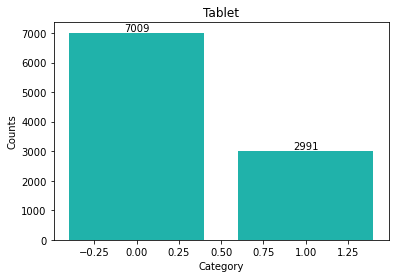



OnlineSecurity
Chi-square test:  Power_divergenceResult(statistic=811.1104, pvalue=2.0724345203754966e-178)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   6424      0.6424
1         1   3576      0.3576




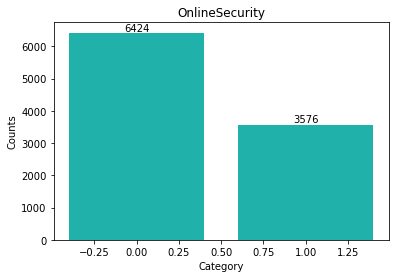



TechSupport
Chi-square test:  Power_divergenceResult(statistic=625.0, pvalue=6.113393412765105e-138)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   6250       0.625
1         1   3750       0.375




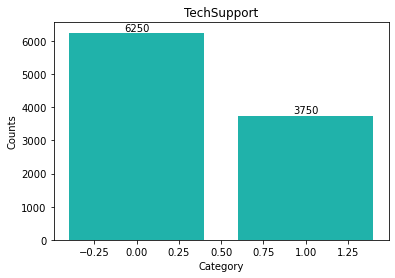



Contract_Monthly
Chi-square test:  Power_divergenceResult(statistic=83.1744, pvalue=7.512432980096114e-20)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         1   5456      0.5456
1         0   4544      0.4544




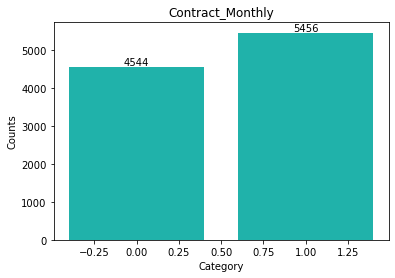



PaperlessBilling
Chi-square test:  Power_divergenceResult(statistic=311.1696, pvalue=1.2146096518734042e-69)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         1   5882      0.5882
1         0   4118      0.4118




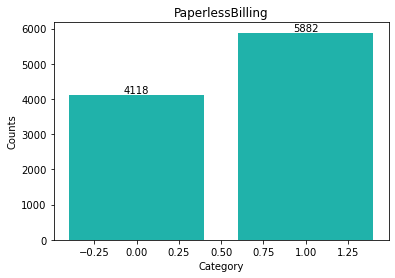



PaymentMethod_Auto
Chi-square test:  Power_divergenceResult(statistic=189.3376, pvalue=4.435268825190397e-43)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         0   5688      0.5688
1         1   4312      0.4312




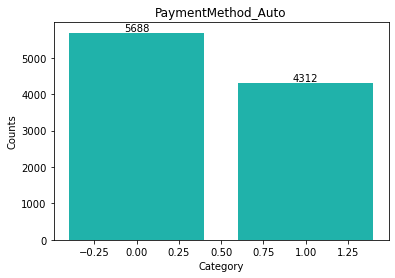



Phone
Chi-square test:  Power_divergenceResult(statistic=6616.1956, pvalue=0.0)
Categories have DIFFERENT distribution
   Category  Count  Percentage
0         1   9067      0.9067
1         0    933      0.0933




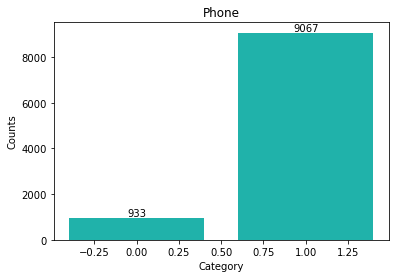

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

for column_name in categorical_columns_array:
  print("\n")
  print(column_name)

  sample = df.loc[:, column_name]
  categories = np.unique(sample)
  categories_counts = sample.value_counts()
  percentages = df[column_name].value_counts(dropna=False, normalize=True)

  #Performing Chi-square test
  # H0: NO statistic significant difference between groups
  # H1: Correlation exists
  chisquareResult = stats.chisquare(categories_counts)
  print("Chi-square test: ", chisquareResult)
  statistic, pValue = chisquareResult

  #Interpret p-value
  #P-value is the probability of H0 being true
  alpha = 0.05
  if pValue <= alpha:
    h0 = False # Reject H0
  else:
    h0 = True # Accept H0

  if (h0):
    print("Categories have SAME distribution")
  else:
    print("Categories have DIFFERENT distribution")
  
  # Build DF for Bar graph
  # custom_index = ['Row'+str(i) for i in range(1, len(categories_counts.values)+1)]
  custom_df = pd.DataFrame(categories_counts)
  custom_df['Percentage'] = percentages
  # Transfrom index as a column
  custom_df.reset_index(level=0, inplace=True)
  # Rename columns
  custom_df.rename(columns = {list(custom_df)[0]:'Category'}, inplace=True)
  custom_df.rename(columns = {list(custom_df)[1]:'Count'}, inplace=True)
  print(custom_df)
  print("\n")


  # Bar Graph
  # https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3

  # fig = plt.figure()
  # ax = fig.add_axes([0,0,1,1])

  bar_graph = plt.bar(x=custom_df['Category'], 
        height=custom_df['Count'],
        color='lightseagreen', #https://matplotlib.org/3.1.0/gallery/color/named_colors.html
        #width = 0.5
        )
  plt.ylabel("Counts")
  plt.xlabel("Category")
  plt.title(column_name)

  # Add counts above the graph
  for rect in bar_graph:
      x = rect.get_x()
      height = rect.get_height()
      plt.text(x=rect.get_x() + rect.get_width() / 2, y=height+.10,
      s="{}".format(height),
      ha='center', 
      va='bottom')


  plt.show()
